
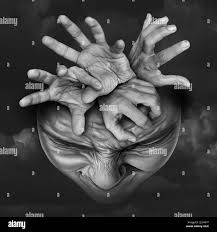
#  Anxiety Attack Dataset Analysis

NAME : ROHITH

Organization : Entri Elevate

Date : 22/02/2025

# 1. Introduction
Anxiety disorders are one of the most common mental health conditions affecting people worldwide. The goal of this project is to analyze and predict the severity of anxiety attacks based on various psychological and physiological factors using machine learning techniques.



# 2. Dataset Overview
📂 Dataset Name: anxiety_attack_dataset.csv

The dataset consists of multiple features related to an individual’s mental, emotional, and physical state.

🔹 Key Features (Columns in Dataset):

*    ID → Unique identifier for each individual (can be dropped).
*  Age → Age of the individual.

*   Gender → Male, Female, or Oth

*  Heart Rate → Heart rate measured during an anxiety episode.

*   Blood Pressure → Blood pressure reading.
* Sleep Duration → Hours of sleep per night.


*  Physical Activity → Amount of physical exercise per week.


*  Stress Level → Self-reported stress level (scale of 1-10).

*   Caffeine Intake → Daily caffeine consumption.
*   Severity of Anxiety Attack (1-10) → Target Variable (higher values indicate more severe anxiety attacks).


# . Project Objectives
The main objective of this project is to use machine learning to predict the severity of an anxiety attack based on the given features.



*   Perform data preprocessing (handling missing values, encoding categorical features, scaling).

*   Feature selection using statistical techniques (like SelectKBest)
*   Train multiple ML models (Logistic Regression, Random Forest, SVM)


*   Tune hyperparameters to improve model performance.














In [50]:
# import pandas for reading the file we uploaded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
import joblib

In [51]:
data = pd.read_csv(r"/content/anxiety_attack_dataset.csv")
data

ID  Age  Gender Occupation  Sleep Hours  \
0          1   56  Female      Other          9.6   
1          2   46    Male    Teacher          6.4   
2          3   32  Female     Doctor          6.9   
3          4   60    Male     Doctor          9.2   
4          5   25    Male    Student          9.2   
...      ...  ...     ...        ...          ...   
11995  11996   28    Male   Engineer          4.4   
11996  11997   49  Female     Doctor          9.9   
11997  11998   23  Female    Student          9.8   
11998  11999   52    Male    Teacher          5.9   
11999  12000   50    Male    Teacher          6.6   

       Physical Activity (hrs/week)  Caffeine Intake (mg/day)  \
0                               8.3                       175   
1                               7.3                        97   
2                               1.0                       467   
3                               3.7                       471   
4                               2.5                       364   
...                             ...                       ...   
11995                           4.1                       360   
11996                           2.2                       433   
11997                           8.1                       140   
11998                           6.6                       114   
11999                           7.8                       114   

       Alcohol Consumption (drinks/week) Smoking Family History of Anxiety  \
0                                      6      No                        No   
1                                      6      No                        No   
2                                     14      No                        No   
3                                     16      No                       Yes   
4                                      2      No                       Yes   
...                                  ...     ...                       ...   
11995                                  1     Yes                       Yes   
11996                                  4      No                       Yes   
11997                                 19     Yes                        No   
11998                                 12      No                        No   
11999                                  0      No                        No   

       Stress Level (1-10)  Heart Rate (bpm during attack)  \
0                        4                             145   
1                        3                             143   
2                        2                              60   
3                        6                              94   
4                        7                             152   
...                    ...                             ...   
11995                    1                             139   
11996                    4                             150   
11997                    2                              81   
11998                    9                              90   
11999                    7                             107   

       Breathing Rate (breaths/min)  Sweating Level (1-5) Dizziness  \
0                                33                     3        No   
1                                18                     5       Yes   
2                                34                     1        No   
3                                19                     1        No   
4                                15                     4        No   
...                             ...                   ...       ...   
11995                            20                     2       Yes   
11996                            33                     2        No   
11997                            33                     2        No   
11998                            14                     5        No   
11999                            19                     2        No   

      Medication  Therapy Sessions (per month) Recent Maj

In [52]:
target_value = data['Severity of Anxiety Attack (1-10)'].value_counts()
target_value

Severity of Anxiety Attack (1-10)
5     1254
7     1224
6     1224
4     1202
1     1201
9     1191
10    1187
8     1187
2     1175
3     1155
Name: count, dtype: int64

In [53]:
# using info function we get the all information of our data including rows and columns and type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [54]:
# below shown are the columns name of the data
column_name=list(data.columns)
column_name

['ID',
 'Age',
 'Gender',
 'Occupation',
 'Sleep Hours',
 'Physical Activity (hrs/week)',
 'Caffeine Intake (mg/day)',
 'Alcohol Consumption (drinks/week)',
 'Smoking',
 'Family History of Anxiety',
 'Stress Level (1-10)',
 'Heart Rate (bpm during attack)',
 'Breathing Rate (breaths/min)',
 'Sweating Level (1-5)',
 'Dizziness',
 'Medication',
 'Therapy Sessions (per month)',
 'Recent Major Life Event',
 'Diet Quality (1-10)',
 'Severity of Anxiety Attack (1-10)']

In [55]:
# duplicate function is used for find out the duplicate values, usinf sum function we get the total number of duplicate values

data.duplicated().sum()

0

We dont have any duplicate values in our dataset

In [56]:
# by using isnull function we find out that there is no null values in the data set

data.isnull().sum()

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

The presence of the null values is also zero.

In [57]:
# we get the statistical insight like mean,median,mode,standard deviation 1st quartile and 3 rd quartile of the data by using describe function

data.describe()

ID          Age   Sleep Hours  Physical Activity (hrs/week)  \
count  12000.00000  12000.00000  12000.000000                  12000.000000   
mean    6000.50000     40.96675      6.482650                      5.030892   
std     3464.24595     13.47328      2.014885                      2.889000   
min        1.00000     18.00000      3.000000                      0.000000   
25%     3000.75000     29.00000      4.800000                      2.500000   
50%     6000.50000     41.00000      6.500000                      5.000000   
75%     9000.25000     53.00000      8.200000                      7.525000   
max    12000.00000     64.00000     10.000000                     10.000000   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
count              12000.000000                       12000.000000   
mean                 246.696083                           9.492833   
std                  144.487071                           5.769364   
min                    0.000000                           0.000000   
25%                  122.000000                           5.000000   
50%                  244.000000                           9.000000   
75%                  371.000000                          15.000000   
max                  499.000000                          19.000000   

       Stress Level (1-10)  Heart Rate (bpm during attack)  \
count         12000.000000                    12000.000000   
mean              5.462250                      119.398500   
std               2.897201                       34.806711   
min               1.000000                       60.000000   
25%               3.000000                       89.000000   
50%               5.000000                      119.000000   
75%               8.000000                      149.000000   
max              10.000000                      179.000000   

       Breathing Rate (breaths/min)  Sweating Level (1-5)  \
count                  12000.000000          12000.000000   
mean                      25.462333              2.987417   
std                        8.090686              1.414482   
min                       12.000000              1.000000   
25%                       18.000000              2.000000   
50%                       25.000000              3.000000   
75%                       32.000000              4.000000   
max                       39.000000              5.000000   

       Therapy Sessions (per month)  Diet Quality (1-10)  \
count                  12000.000000         12000.000000   
mean                       4.518417             5.497333   
std                        2.866010             2.867579   
min                        0.000000             1.000000   
25%                        2.000000             3.000000   
50%                        5.000000             5.000000   
75%                        7.000000             8.000000   
max                        9.000000            10.000000   

       Severity of Anxiety Attack (1-10)  
count                       12000.000000  
mean                            5.507583  
std                             2.858663  
min                             1.000000  
25%                             3.000000  
50%                             6.000000  
75%                             8.000000  
max                            10.000000

Here we can easily get the all numeric columns measn median and SD of our data.

In [58]:
# here we find out the total number of rows and columns of our data
shape=data.shape
shape

(12000, 20)

In [59]:
# for visualisation of data we need to import the below modules
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [60]:
# by using select_dtype we selected the numerical data for drawing a boxplot graph
numeric_columns = data.select_dtypes(include=np.number)

In [61]:
# by drop function we deleted the the id column because here id column is not needed
numeric_column =numeric_columns.drop("ID",axis=1)

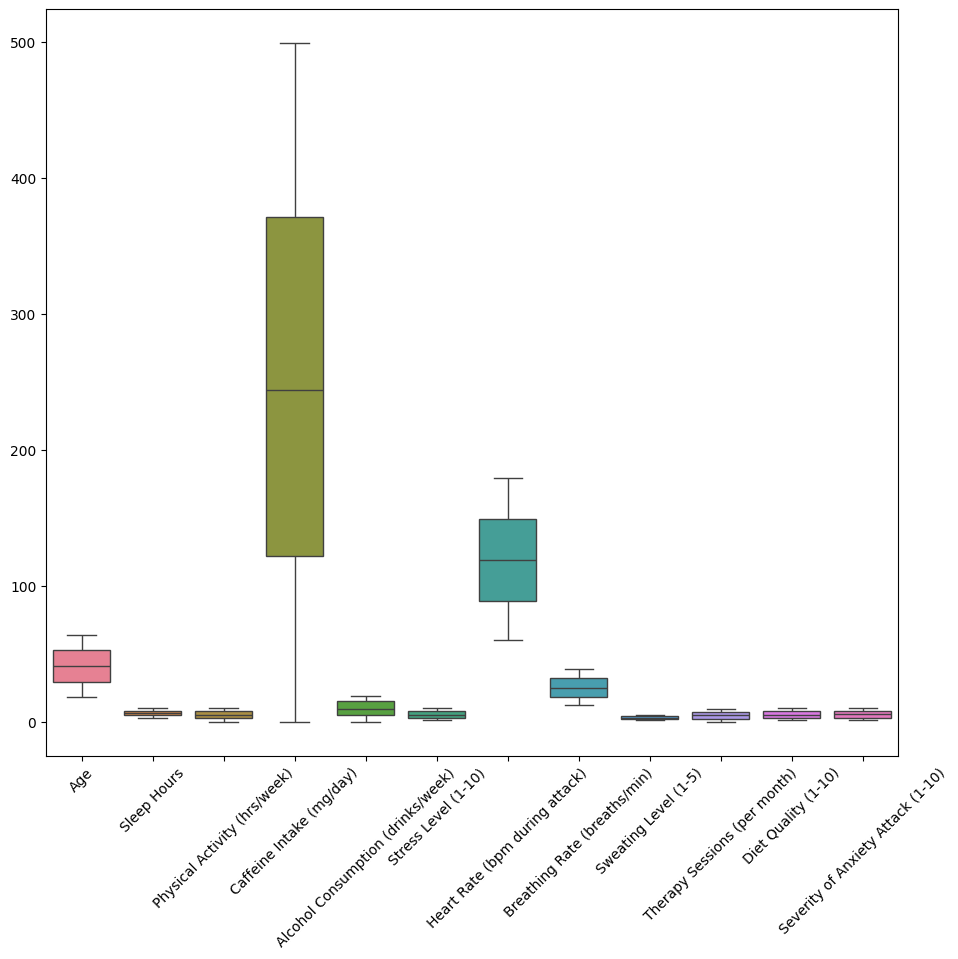

In [62]:
# for find out outliers we draw a boxplot
plt.figure(figsize=(10,8))
sns.boxplot(data=numeric_column)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# there is no outliers in the data

From this boxplot we can easily read that there is no outliers presence in our data.


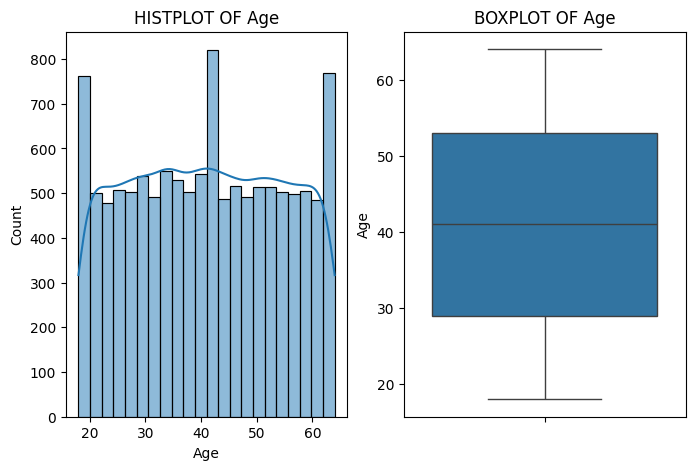

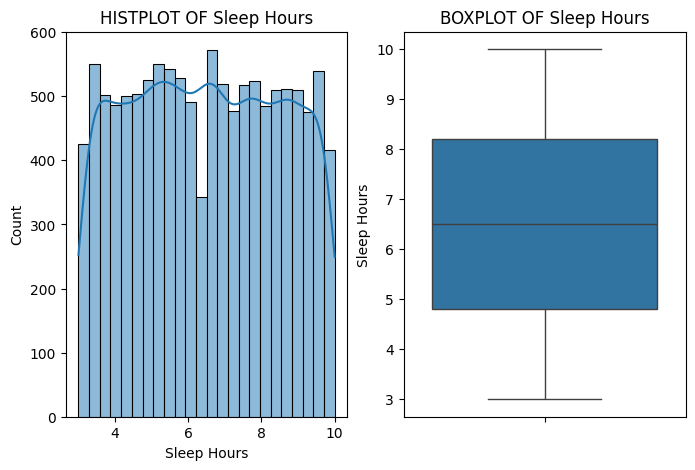

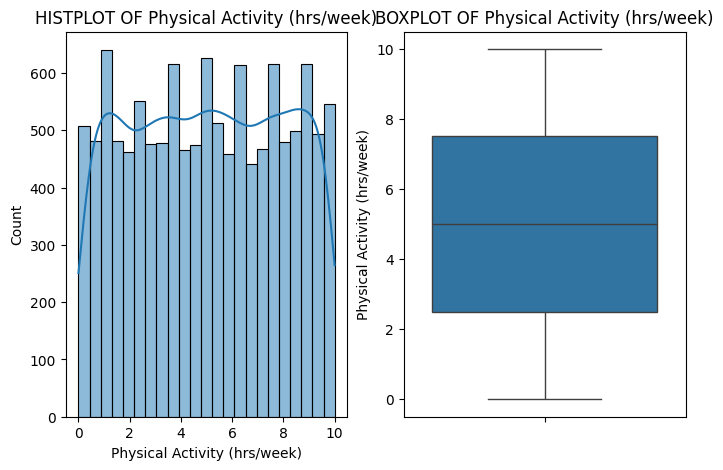

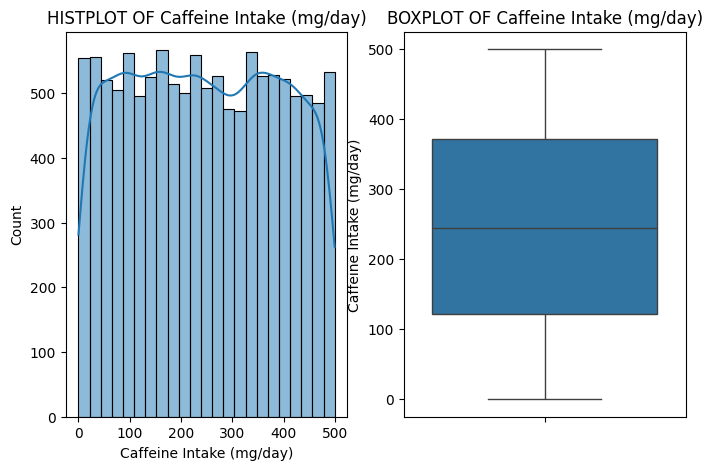

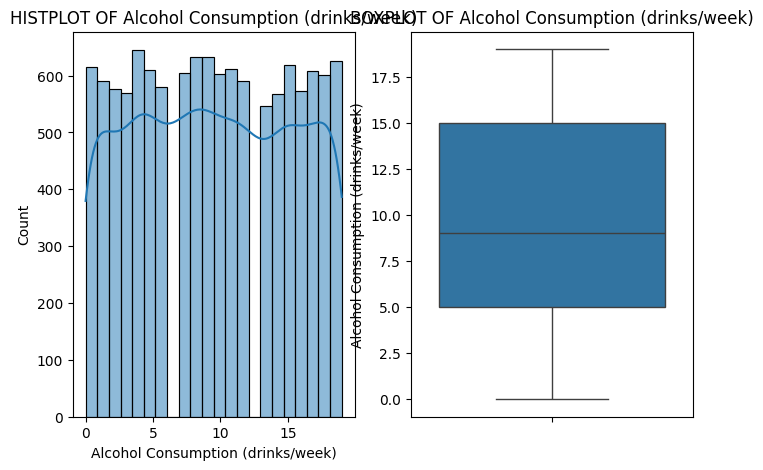

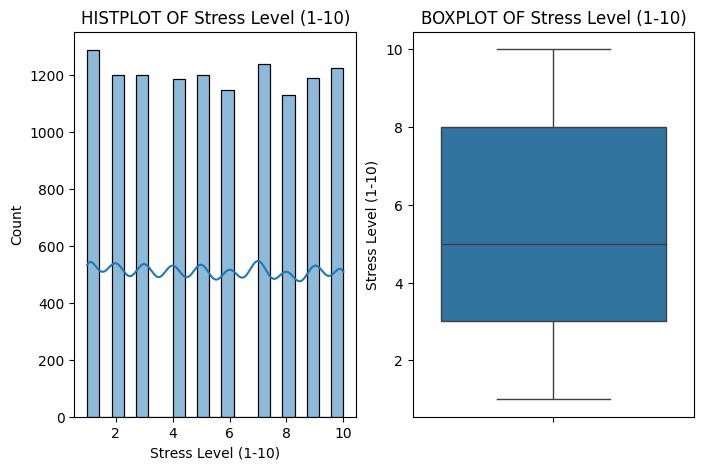

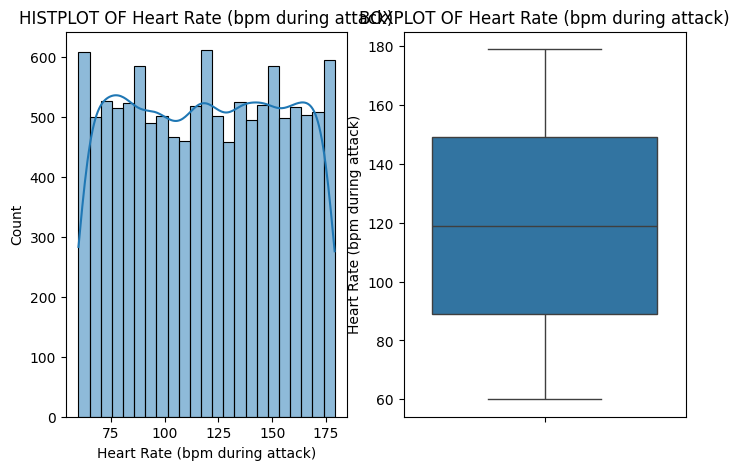

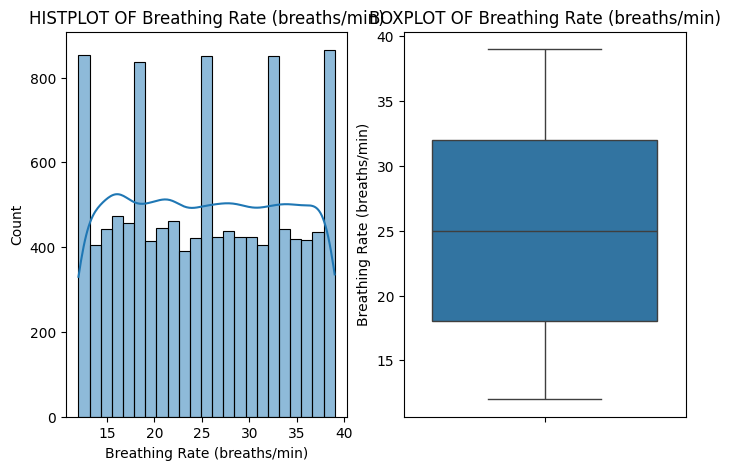

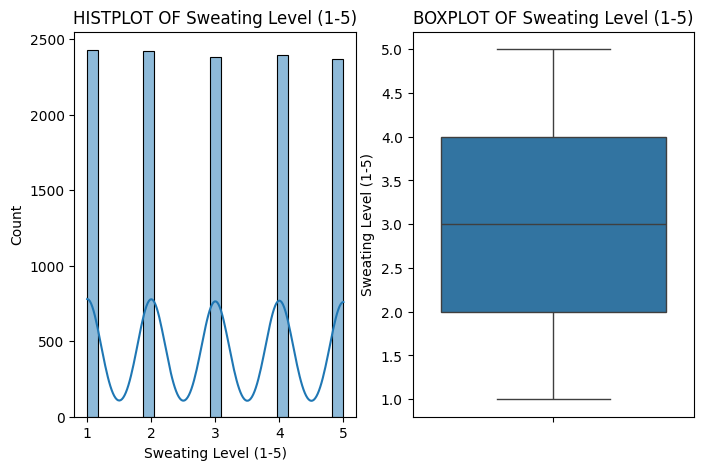

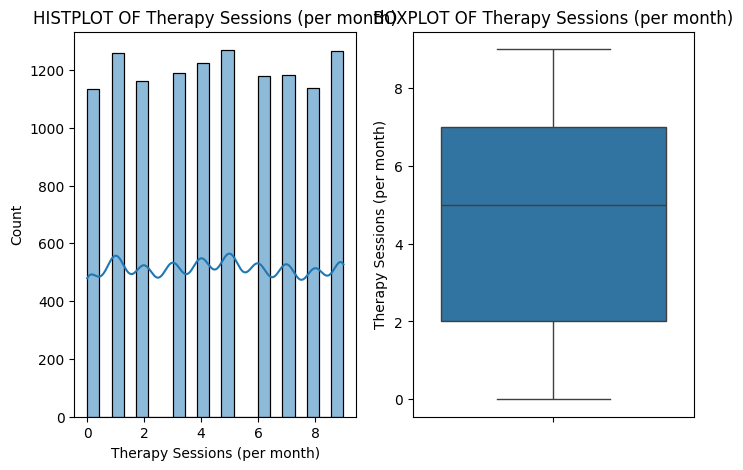

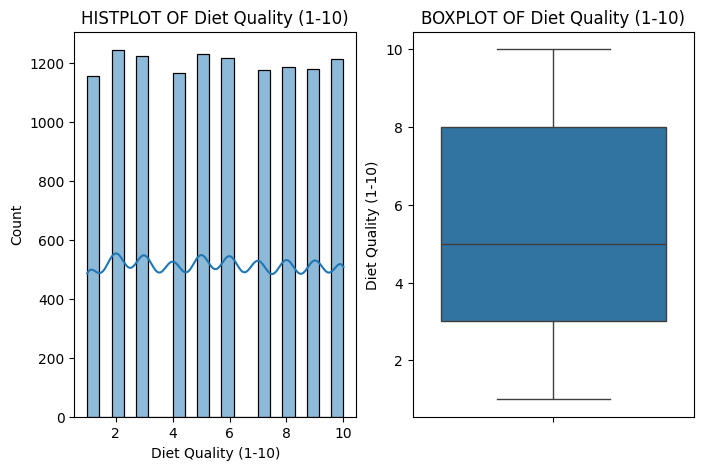

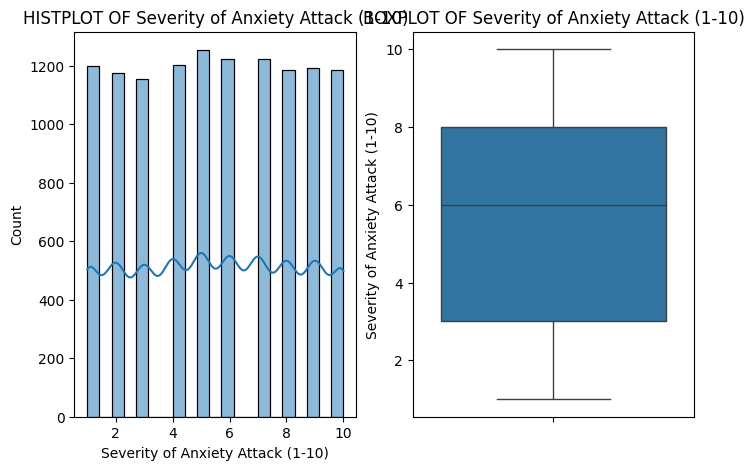

In [63]:
for i in numeric_column:
  plt.figure(figsize=(8, 5))

  plt.subplot(1, 2, 1)
  sns.histplot(numeric_column[i],kde=True)
  plt.title(f'HISTPLOT OF {i}')


  plt.subplot(1, 2, 2)
  sns.boxplot(data=numeric_column[i])
  plt.xticks(rotation=45)
  plt.title(f'BOXPLOT OF {i}')


In [64]:
# using skew() function we get the skewness of the data
numeric_column.skew()

# from the below all values are in between -0.5 & 0.5 so we conclude that there is no skewness.

Age                                  0.007867
Sleep Hours                          0.015522
Physical Activity (hrs/week)        -0.010955
Caffeine Intake (mg/day)             0.020417
Alcohol Consumption (drinks/week)    0.012371
Stress Level (1-10)                  0.014473
Heart Rate (bpm during attack)      -0.002618
Breathing Rate (breaths/min)         0.012089
Sweating Level (1-5)                 0.011466
Therapy Sessions (per month)         0.005728
Diet Quality (1-10)                  0.010652
Severity of Anxiety Attack (1-10)   -0.008028
dtype: float64

from the above values we get the skewness of the numeric data, Age,Heart Rate,Therapy session and the severity of anxiety attack are nearly symmetric. And there is no extrem skewness for the numeric data.

In [65]:
# here we take the categorical data
categorical_data=data.select_dtypes(object)
categorical_data

Gender Occupation Smoking Family History of Anxiety Dizziness  \
0      Female      Other      No                        No        No   
1        Male    Teacher      No                        No       Yes   
2      Female     Doctor      No                        No        No   
3        Male     Doctor      No                       Yes        No   
4        Male    Student      No                       Yes        No   
...       ...        ...     ...                       ...       ...   
11995    Male   Engineer     Yes                       Yes       Yes   
11996  Female     Doctor      No                       Yes        No   
11997  Female    Student     Yes                        No        No   
11998    Male    Teacher      No                        No        No   
11999    Male    Teacher      No                        No        No   

      Medication Recent Major Life Event  
0             No                     Yes  
1             No                      No  
2             No                     Yes  
3            Yes                     Yes  
4            Yes                      No  
...          ...                     ...  
11995         No                      No  
11996         No                      No  
11997         No                      No  
11998         No                      No  
11999        Yes                      No  

[12000 rows x 7 columns]

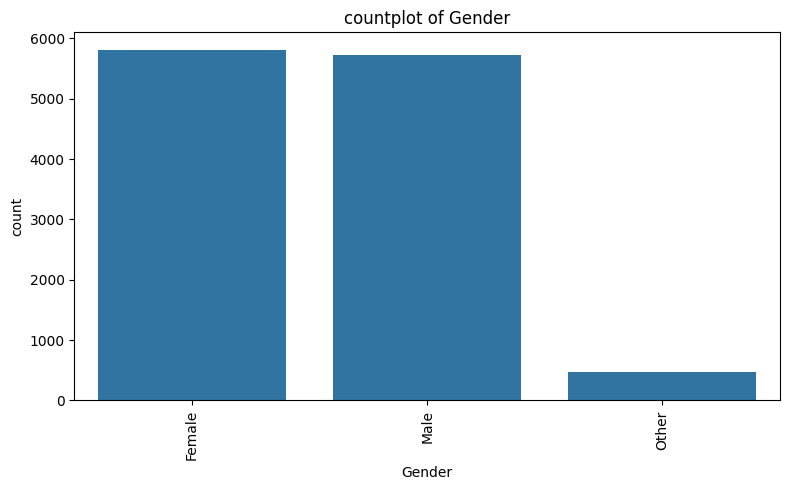

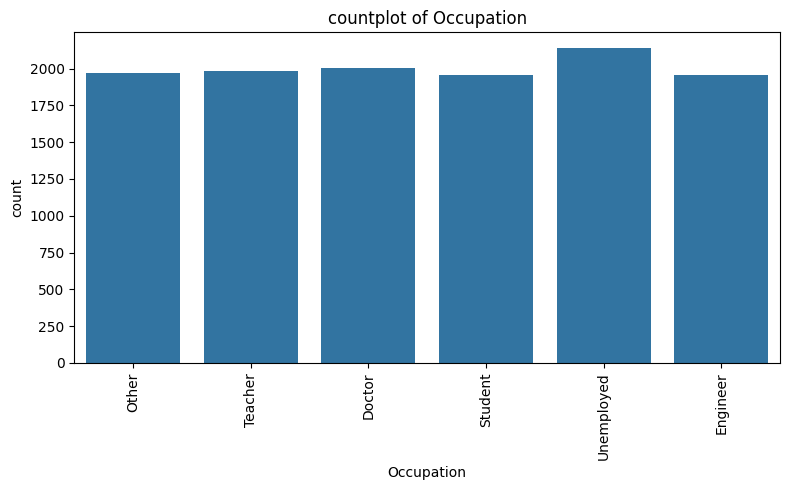

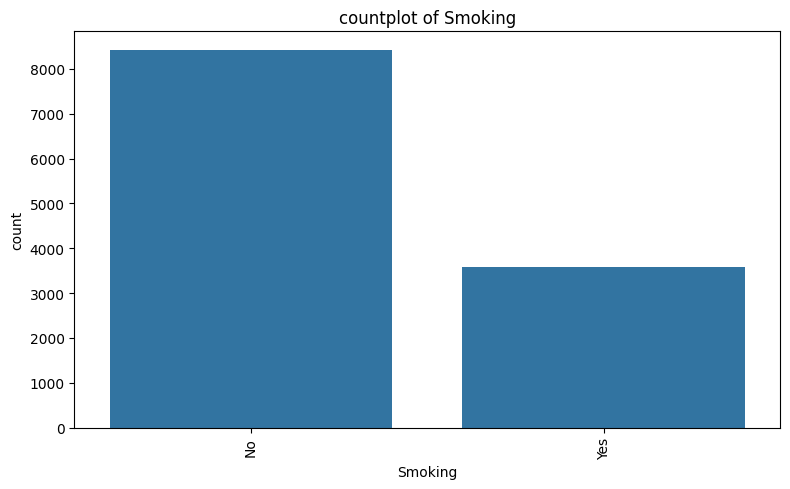

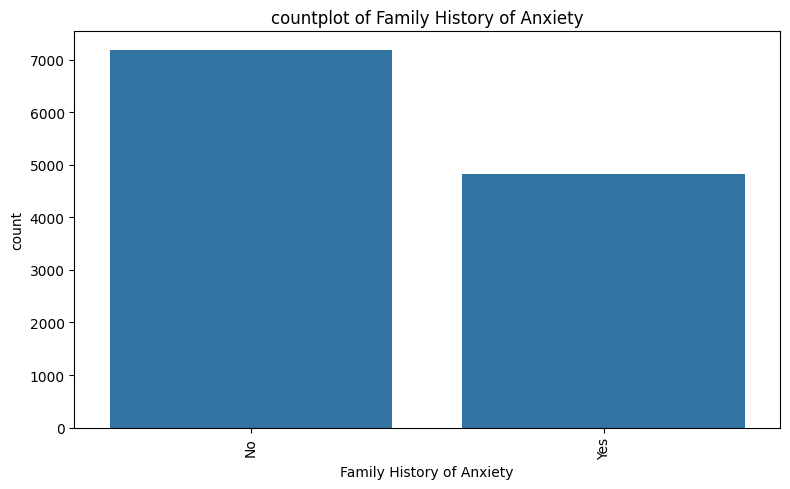

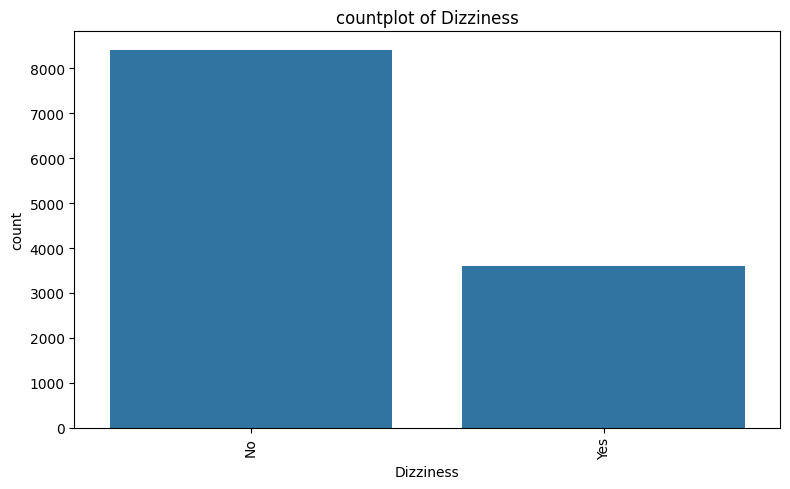

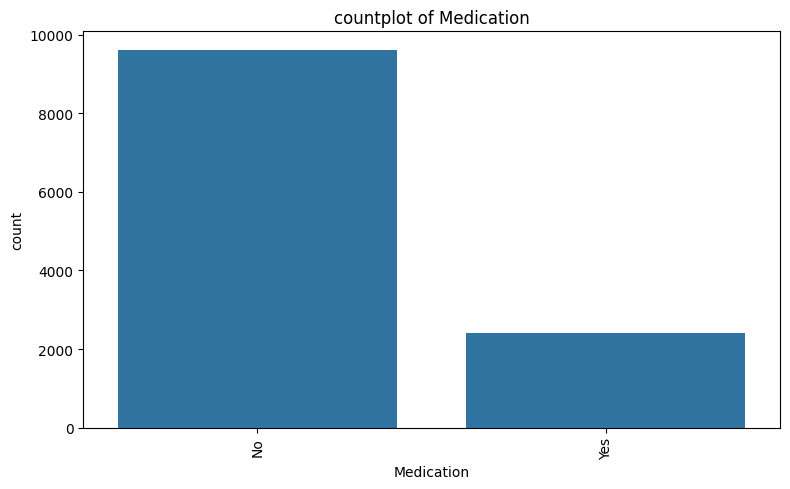

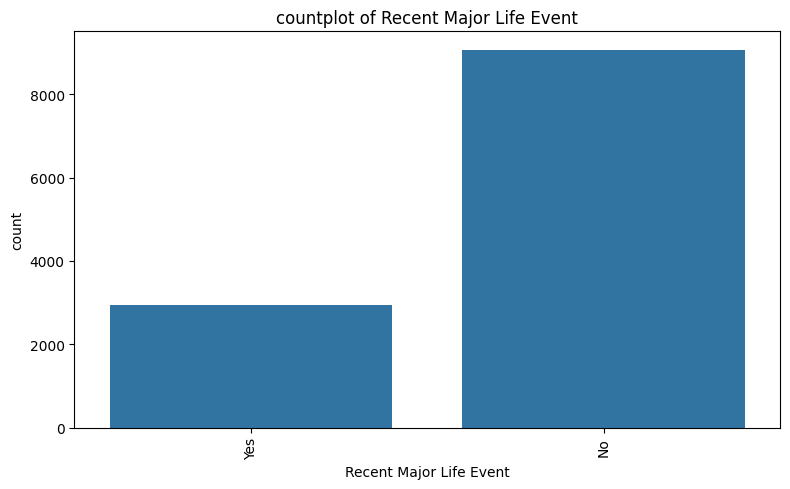

In [66]:
# by using countplot we get the distriution of categorical data

for i in categorical_data:
  plt.figure(figsize=(8,5,))
  plt.title(f'countplot of {i}')
  sns.countplot(x=i,data=categorical_data)
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

From the above countplot we can read the severity of anxiety attack rating(10) is more in umemployed people and least in students

From the above the sleep hours are parellel to y axis that means there is no relation with sleeping hours with anxiety attack.
For this data scatterplots only gives a parellel graph to x axis.


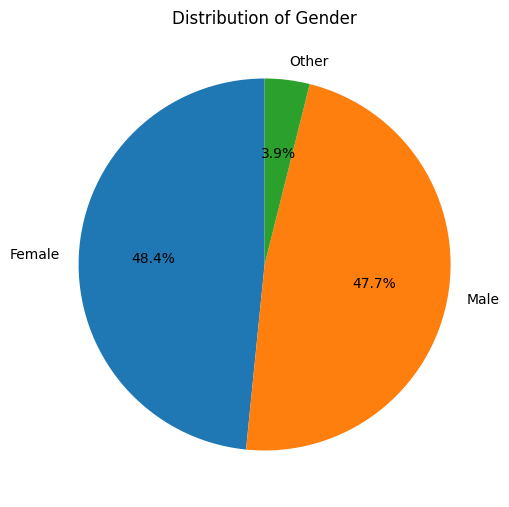

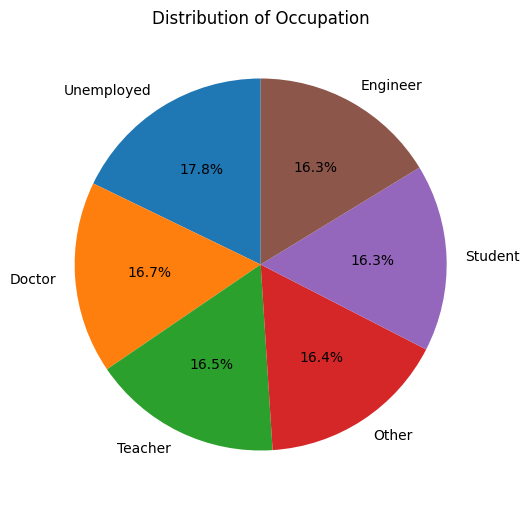

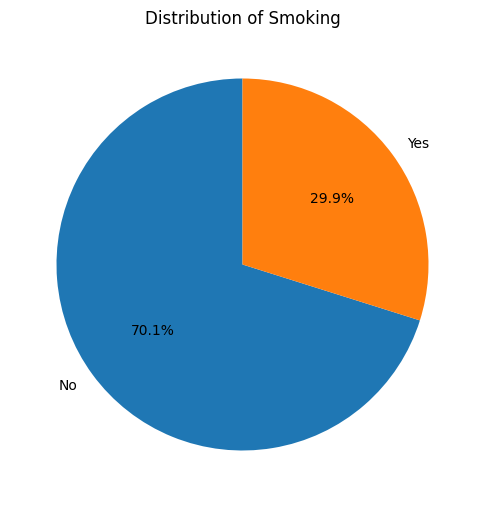

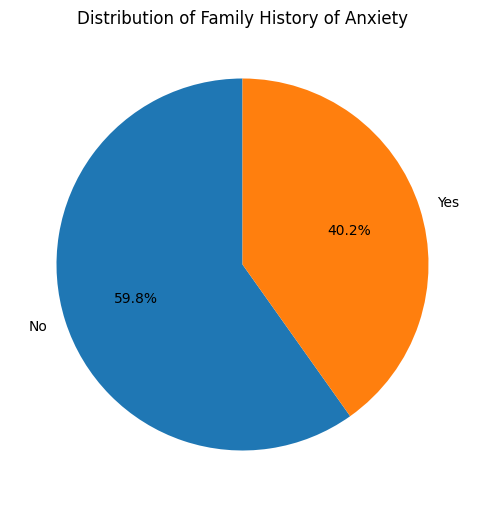

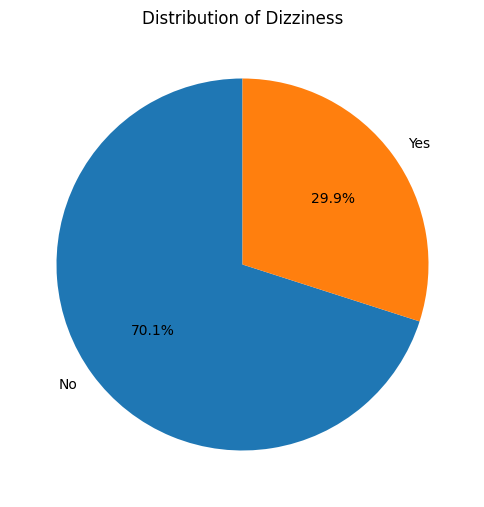

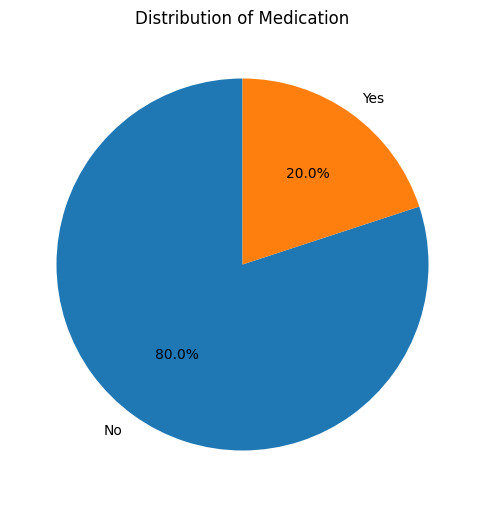

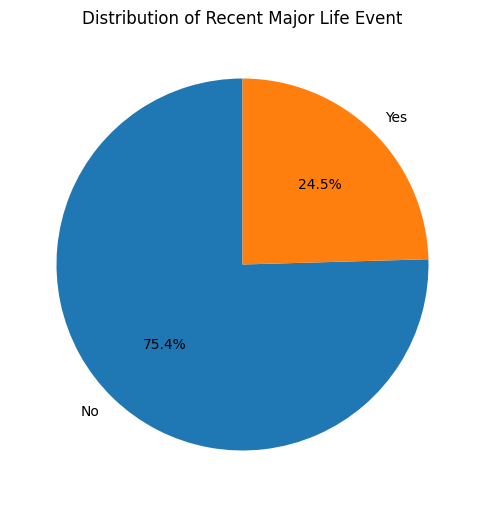

In [67]:
columns = ['Gender','Occupation','Smoking','Family History of Anxiety','Dizziness', 'Medication', 'Recent Major Life Event']

for column in columns:
  category_counts = data[column].value_counts()
  plt.figure(figsize=(6,7))
  plt.pie(category_counts,labels=category_counts.index,autopct='%1.1f%%',startangle=90)
  plt.title(f"Distribution of {column}")
  plt.show()



From the above pie chart we get a clear picture of how our categorcal datas are distributed.

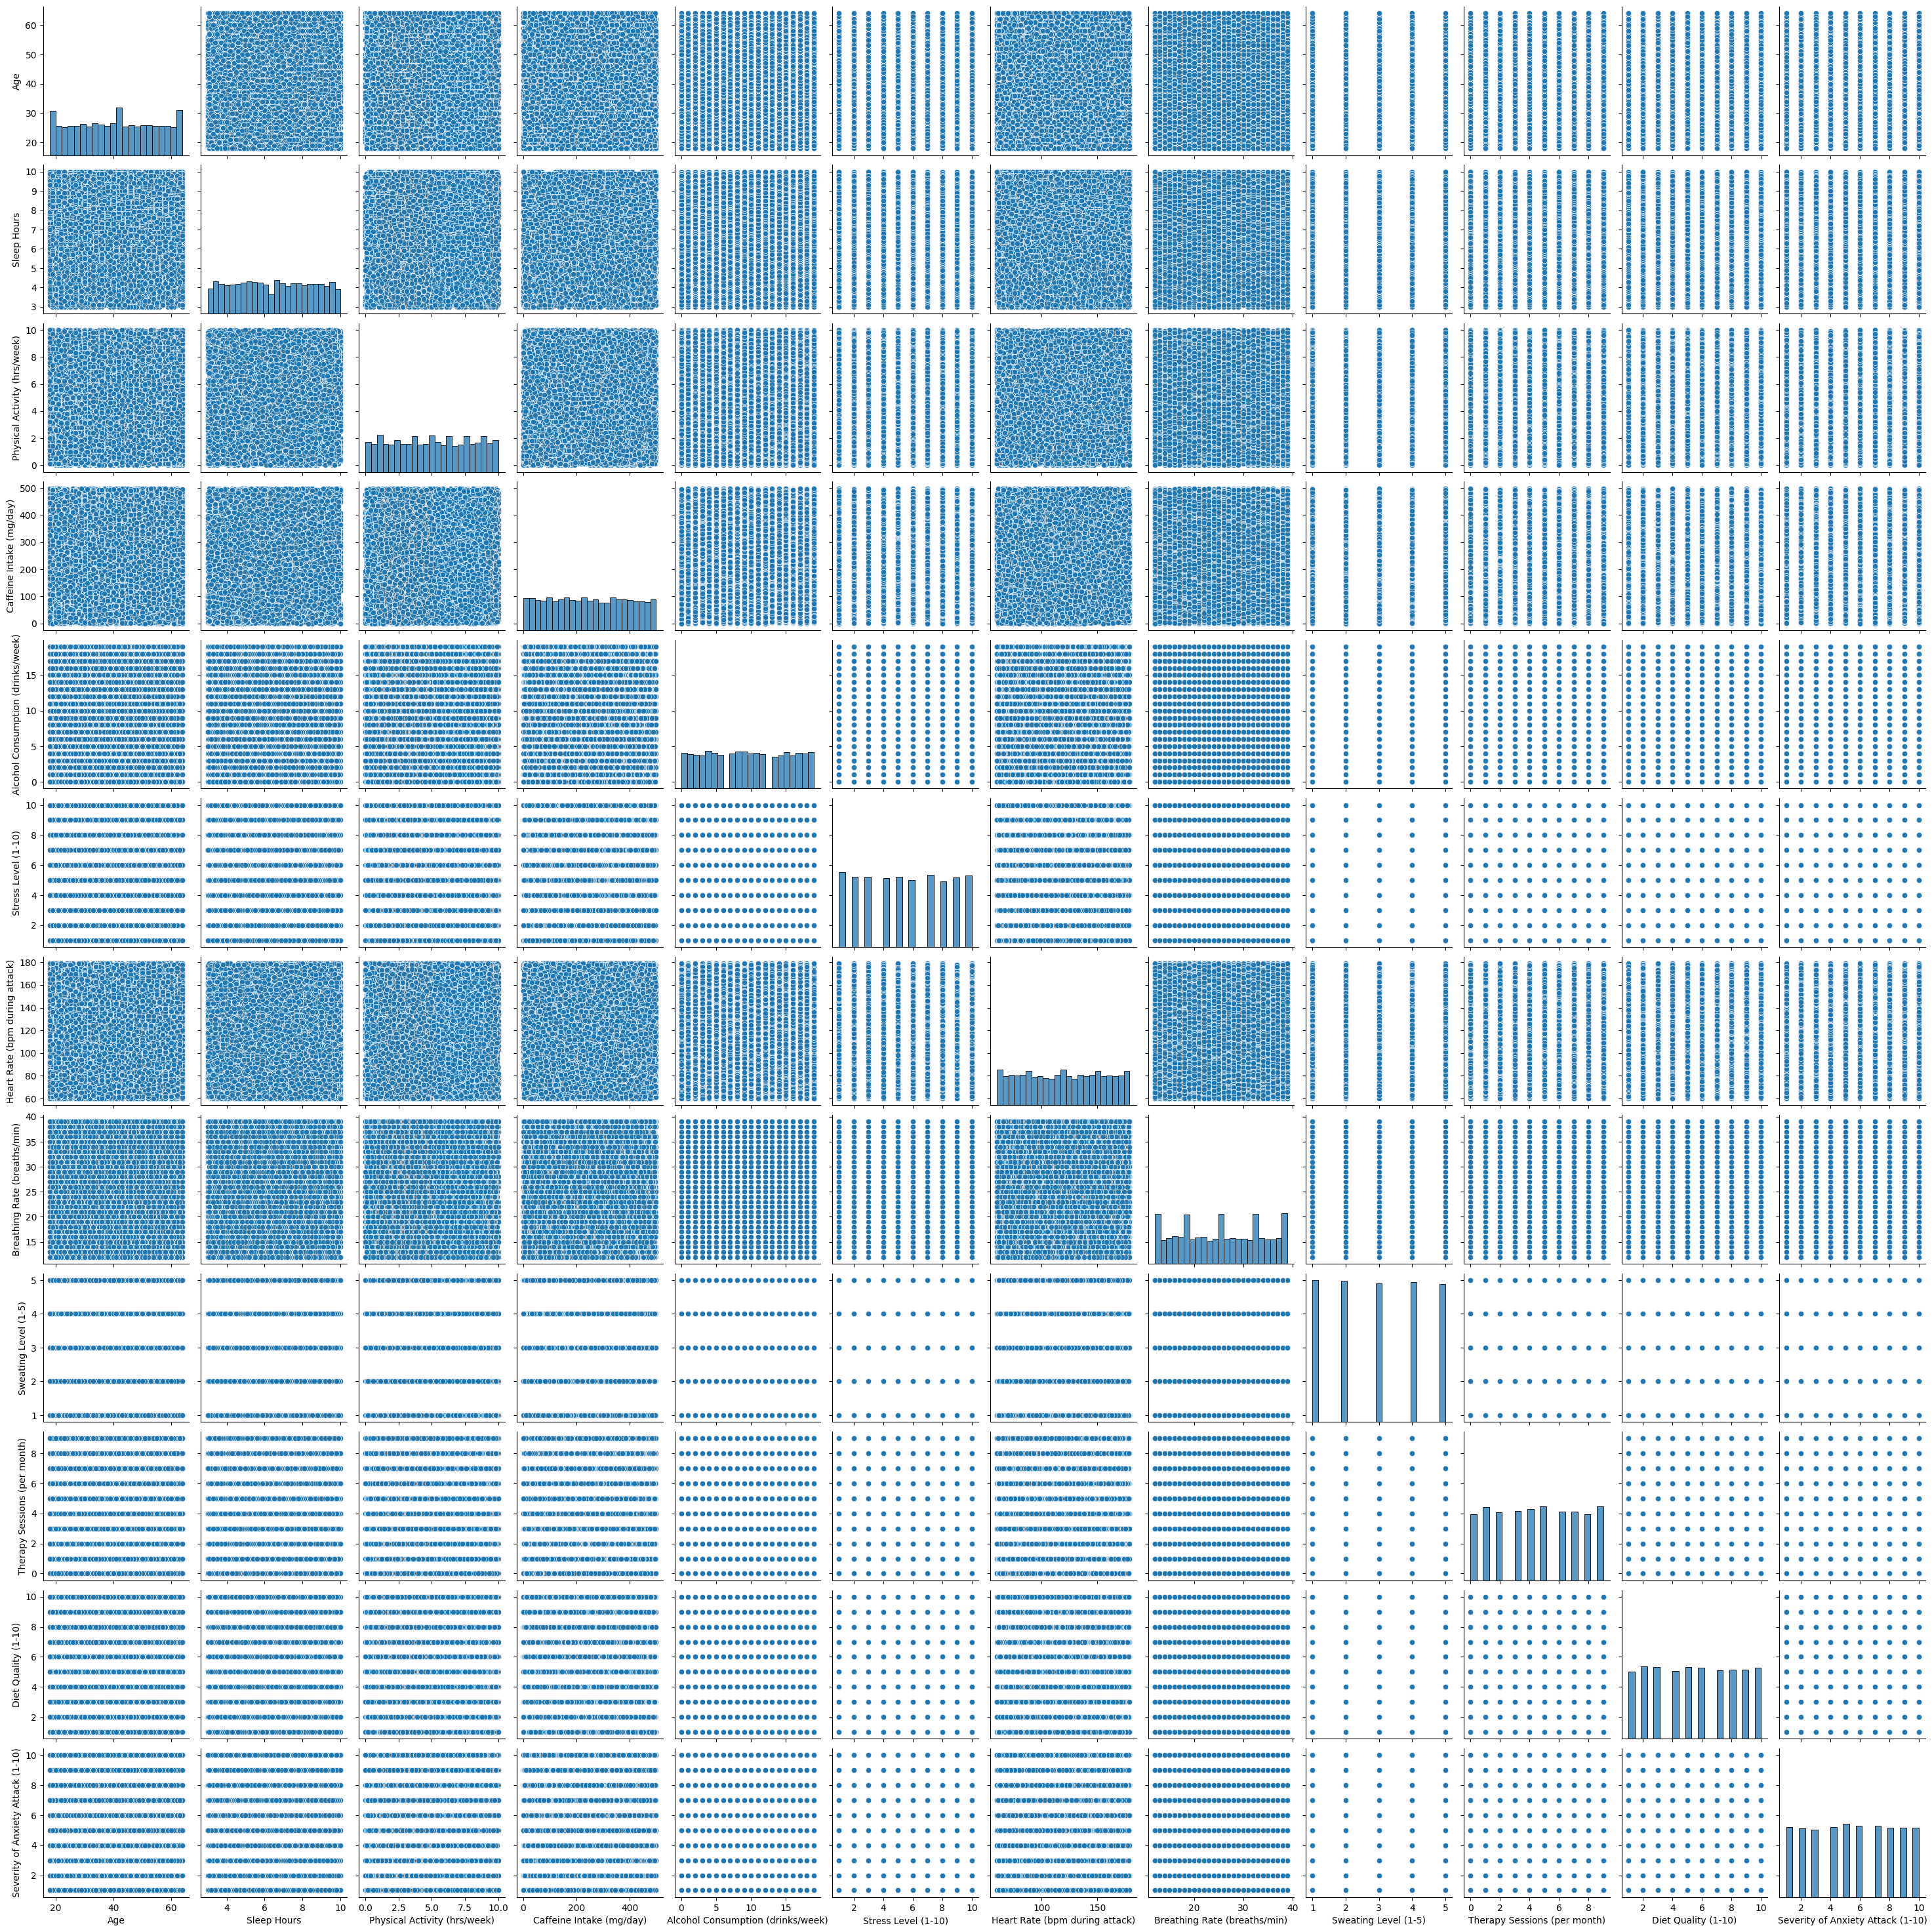

In [68]:
#pairplot for the numerical data relationship
numerical_data = ['Age','Sleep Hours','Physical Activity (hrs/week)','Caffeine Intake (mg/day)','Alcohol Consumption (drinks/week)','Stress Level (1-10)','Heart Rate (bpm during attack)','Breathing Rate (breaths/min)','Sweating Level (1-5)','Therapy Sessions (per month)','Diet Quality (1-10)','Severity of Anxiety Attack (1-10)']
plt.show()
sns.pairplot(data[numerical_data])

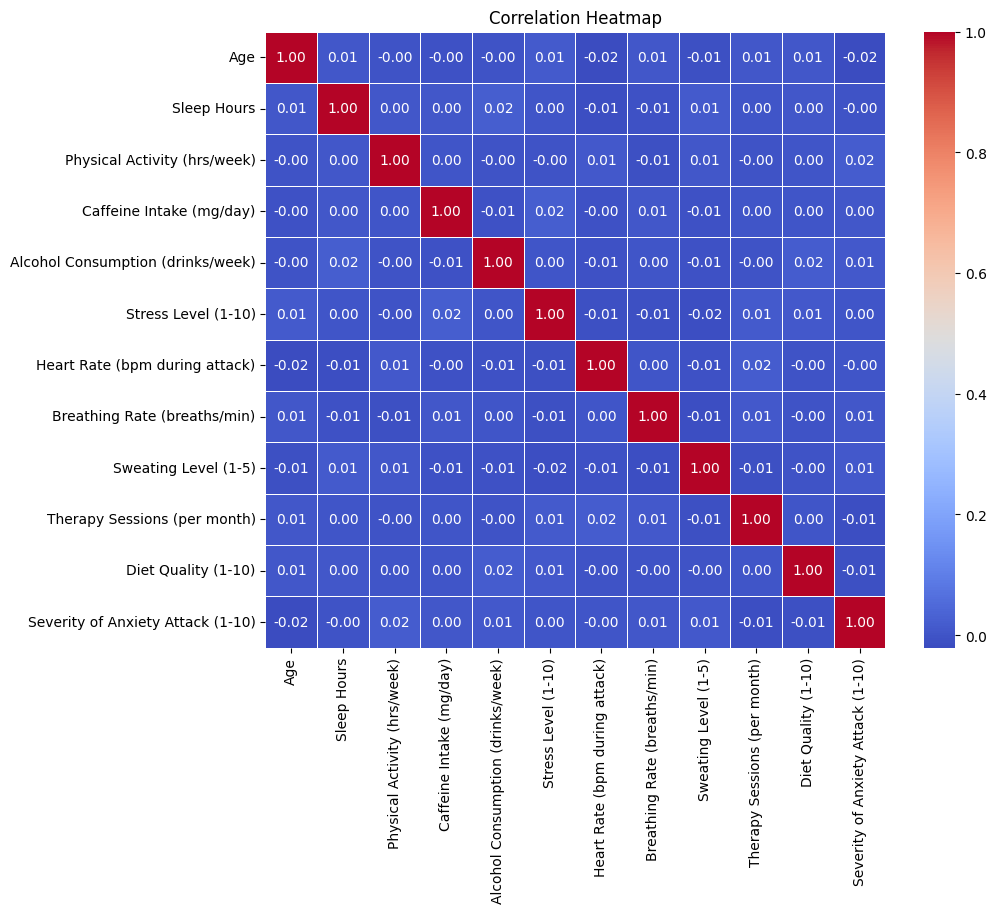

In [69]:
# heatmap for explore the relationship between the variable

corr_matrix = numeric_column.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()



from the heatmap we can see that only daigonal values have strong relationship and other have no strong relationship, from the graph value is indicating +1 have strong linear correlation and value is -1 is negative linear correlation and 0 indicates there is no correlation.


In [70]:
# Categorical values
categorical_data

Gender Occupation Smoking Family History of Anxiety Dizziness  \
0      Female      Other      No                        No        No   
1        Male    Teacher      No                        No       Yes   
2      Female     Doctor      No                        No        No   
3        Male     Doctor      No                       Yes        No   
4        Male    Student      No                       Yes        No   
...       ...        ...     ...                       ...       ...   
11995    Male   Engineer     Yes                       Yes       Yes   
11996  Female     Doctor      No                       Yes        No   
11997  Female    Student     Yes                        No        No   
11998    Male    Teacher      No                        No        No   
11999    Male    Teacher      No                        No        No   

      Medication Recent Major Life Event  
0             No                     Yes  
1             No                      No  
2             No                     Yes  
3            Yes                     Yes  
4            Yes                      No  
...          ...                     ...  
11995         No                      No  
11996         No                      No  
11997         No                      No  
11998         No                      No  
11999        Yes                      No  

[12000 rows x 7 columns]

In [71]:
numeric_column.columns

Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm during attack)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
       'Therapy Sessions (per month)', 'Diet Quality (1-10)',
       'Severity of Anxiety Attack (1-10)'],
      dtype='object')

In [72]:
X = data[['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm during attack)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
       'Therapy Sessions (per month)', 'Diet Quality (1-10)']]

X =add_constant(X)

In [73]:
# Created a data frame to store VIF values
vif_data = pd.DataFrame()
vif_data["features"]= X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

print(vif_data)


                             features        VIF
0                               const  65.304615
1                                 Age   1.000917
2                         Sleep Hours   1.000991
3        Physical Activity (hrs/week)   1.000266
4            Caffeine Intake (mg/day)   1.000636
5   Alcohol Consumption (drinks/week)   1.000997
6                 Stress Level (1-10)   1.001335
7      Heart Rate (bpm during attack)   1.001221
8        Breathing Rate (breaths/min)   1.000648
9                Sweating Level (1-5)   1.001021
10       Therapy Sessions (per month)   1.000837
11                Diet Quality (1-10)   1.000509


To find out the multicollinearity we calculate the VIF method[varaince inflaction factor]. From the above we confirmed that all values are less then 5 so there is no multocollinearity.

In [74]:
print(data.dtypes)

ID                                     int64
Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm during attack)         int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Severity of Anxiety Attack (1-10)      int64
dtype: object


#Machine Learning

In [82]:
# Apply one-hot encoding
one_hot_encoded = pd.get_dummies(data, columns=['Occupation', 'Gender'], drop_first=True,dtype=int)

#  Binary Encoding for Boolean Features

encod_bool_columns = ['Smoking','Family History of Anxiety','Dizziness','Medication','Recent Major Life Event'] # Removed the extra space in 'Recent Major Life Event'

for column in encod_bool_columns:
  data[column] =data[column].replace({'Yes':1,'No':0})

encode_bool_df = data[encod_bool_columns]

number_data = data.select_dtypes(include='number')


<ipython-input-82-eaa5bcf2e775>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] =data[column].replace({'Yes':1,'No':0})


In [75]:
data.shape

(12000, 20)

In [76]:
one_hot_encoded = pd.get_dummies(data, columns=['Occupation', 'Gender'], drop_first=True,dtype=int)
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Sleep Hours                        12000 non-null  float64
 3   Physical Activity (hrs/week)       12000 non-null  float64
 4   Caffeine Intake (mg/day)           12000 non-null  int64  
 5   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 6   Smoking                            12000 non-null  object 
 7   Family History of Anxiety          12000 non-null  object 
 8   Stress Level (1-10)                12000 non-null  int64  
 9   Heart Rate (bpm during attack)     12000 non-null  int64  
 10  Breathing Rate (breaths/min)       12000 non-null  int64  
 11  Sweating Level (1-5)               12000 non-null  int

In [83]:
one_hot_encoded.drop(columns=['ID','Age','Sleep Hours','Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)','Alcohol Consumption (drinks/week)','Smoking','Family History of Anxiety','Stress Level (1-10)',
'Heart Rate (bpm during attack)','Breathing Rate (breaths/min)','Sweating Level (1-5)','Dizziness','Medication','Therapy Sessions (per month)','Recent Major Life Event','Diet Quality (1-10)','Severity of Anxiety Attack (1-10)'],inplace=True)

In [84]:
print(one_hot_encoded)

       Occupation_Engineer  Occupation_Other  Occupation_Student  \
0                        0                 1                   0   
1                        0                 0                   0   
2                        0                 0                   0   
3                        0                 0                   0   
4                        0                 0                   1   
...                    ...               ...                 ...   
11995                    1                 0                   0   
11996                    0                 0                   0   
11997                    0                 0                   1   
11998                    0                 0                   0   
11999                    0                 0                   0   

       Occupation_Teacher  Occupation_Unemployed  Gender_Male  Gender_Other  
0                       0                      0            0             0  
1                       1  

In [85]:
print(number_data)

          ID  Age  Sleep Hours  Physical Activity (hrs/week)  \
0          1   56          9.6                           8.3   
1          2   46          6.4                           7.3   
2          3   32          6.9                           1.0   
3          4   60          9.2                           3.7   
4          5   25          9.2                           2.5   
...      ...  ...          ...                           ...   
11995  11996   28          4.4                           4.1   
11996  11997   49          9.9                           2.2   
11997  11998   23          9.8                           8.1   
11998  11999   52          5.9                           6.6   
11999  12000   50          6.6                           7.8   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  \
0                           175                                  6        0   
1                            97                                  6       

In [86]:
encod_data = pd.concat([number_data,one_hot_encoded],axis=1)

print(encod_data)

          ID  Age  Sleep Hours  Physical Activity (hrs/week)  \
0          1   56          9.6                           8.3   
1          2   46          6.4                           7.3   
2          3   32          6.9                           1.0   
3          4   60          9.2                           3.7   
4          5   25          9.2                           2.5   
...      ...  ...          ...                           ...   
11995  11996   28          4.4                           4.1   
11996  11997   49          9.9                           2.2   
11997  11998   23          9.8                           8.1   
11998  11999   52          5.9                           6.6   
11999  12000   50          6.6                           7.8   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  \
0                           175                                  6        0   
1                            97                                  6       

We encoded the data for machine learning

In [87]:
print(number_data.shape)
print(one_hot_encoded.shape)

(12000, 18)
(12000, 7)


In [88]:
encod_data.drop(columns=['ID'], inplace=True)

In [89]:
encod_data.head()

Age  Sleep Hours  Physical Activity (hrs/week)  Caffeine Intake (mg/day)  \
0   56          9.6                           8.3                       175   
1   46          6.4                           7.3                        97   
2   32          6.9                           1.0                       467   
3   60          9.2                           3.7                       471   
4   25          9.2                           2.5                       364   

   Alcohol Consumption (drinks/week)  Smoking  Family History of Anxiety  \
0                                  6        0                          0   
1                                  6        0                          0   
2                                 14        0                          0   
3                                 16        0                          1   
4                                  2        0                          1   

   Stress Level (1-10)  Heart Rate (bpm during attack)  \
0                    4                             145   
1                    3                             143   
2                    2                              60   
3                    6                              94   
4                    7                             152   

   Breathing Rate (breaths/min)  ...  Recent Major Life Event  \
0                            33  ...                        1   
1                            18  ...                        0   
2                            34  ...                        1   
3                            19  ...                        1   
4                            15  ...                        0   

   Diet Quality (1-10)  Severity of Anxiety Attack (1-10)  \
0                    9                                 10   
1                    9                                  8   
2                   10                                  5   
3                    5                                  8   
4                    1                                  1   

   Occupation_Engineer  Occupation_Other  Occupation_Student  \
0                    0                 1                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   1   

   Occupation_Teacher  Occupation_Unemployed  Gender_Male  Gender_Other  
0                   0                      0            0             0  
1                   1                      0            1             0  
2                   0                      0            0             0  
3                   0                      0            1             0  
4                   0                      0            1             0  

[5 rows x 24 columns]

In [92]:
print(encod_data.columns)

Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)',
       'Occupation_Engineer', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Teacher', 'Occupation_Unemployed', 'Gender_Male',
       'Gender_Other'],
      dtype='object')


In [93]:
print(type(encod_data['Severity of Anxiety Attack (1-10)']))

<class 'pandas.core.series.Series'>


In [39]:
# extract only one column

Y = encod_data['Severity of Anxiety Attack (1-10)'].iloc[:,0]

In [40]:
Y= encod_data['Severity of Anxiety Attack (1-10)'].values.ravel()

In [95]:
#  FEATURE SELECTION BY KBEST

X = encod_data.drop(columns=['Severity of Anxiety Attack (1-10)'])  # FEATURES
Y = encod_data['Severity of Anxiety Attack (1-10)']  # TARGET (single column)


selector = SelectKBest(score_func=f_classif,k=23)


x_new = selector.fit_transform(X,Y)

selected_features = X.columns[selector.get_support()]

selected_features_score = pd.DataFrame({
    'feature': selected_features,
    'Score': selector.scores_[selector.get_support()]
})

# Sort by score in descending order
selected_features_score = selected_features_score.sort_values(by='Score',ascending=False)

print(selected_features_score)

                              feature     Score
0                                 Age  2.374059
20              Occupation_Unemployed  1.663722
5                             Smoking  1.621608
15                Diet Quality (1-10)  1.448570
9        Breathing Rate (breaths/min)  1.407242
7                 Stress Level (1-10)  1.354760
13       Therapy Sessions (per month)  1.159470
4   Alcohol Consumption (drinks/week)  1.049333
22                       Gender_Other  1.008229
18                 Occupation_Student  0.986717
17                   Occupation_Other  0.939411
11                          Dizziness  0.920519
2        Physical Activity (hrs/week)  0.913279
16                Occupation_Engineer  0.877848
6           Family History of Anxiety  0.787389
12                         Medication  0.753714
1                         Sleep Hours  0.646731
19                 Occupation_Teacher  0.621283
14            Recent Major Life Event  0.521457
21                        Gender_Male  0

By using selectkbest we took the most relevant features from our dataset. Here Age have more score ie they can predict more accuratley.

In [96]:
selected_features_score.duplicated().sum()

0

In [98]:
# set  threshold for selecting the best features

threshold = 0.5

selected_features = selected_features_score[selected_features_score['Score']>threshold]

print(selected_features)

X_selected_features = X[selected_features['feature']]

                              feature     Score
0                                 Age  2.374059
20              Occupation_Unemployed  1.663722
5                             Smoking  1.621608
15                Diet Quality (1-10)  1.448570
9        Breathing Rate (breaths/min)  1.407242
7                 Stress Level (1-10)  1.354760
13       Therapy Sessions (per month)  1.159470
4   Alcohol Consumption (drinks/week)  1.049333
22                       Gender_Other  1.008229
18                 Occupation_Student  0.986717
17                   Occupation_Other  0.939411
11                          Dizziness  0.920519
2        Physical Activity (hrs/week)  0.913279
16                Occupation_Engineer  0.877848
6           Family History of Anxiety  0.787389
12                         Medication  0.753714
1                         Sleep Hours  0.646731
19                 Occupation_Teacher  0.621283
14            Recent Major Life Event  0.521457
21                        Gender_Male  0

In [99]:
# split the data into training and testing

x_train,x_test,y_train,y_test = train_test_split(X_selected_features,Y,test_size=0.2,random_state=42)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (9600, 20)
x_test shape: (2400, 20)
y_train shape: (9600,)
y_test shape: (2400,)


In [100]:
# standardize the selected features
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [101]:

models = {
    "log_reg": LogisticRegression(C=1, penalty='l2', solver='saga'),
    "svm_model": SVC(C= 10, gamma= 'scale', kernel='rbf'),
    "rf_model": RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10),
    "GaussianNB": GaussianNB(var_smoothing=0.006579332246575682),
    "knn": KNeighborsClassifier(n_neighbors=7, p=1, weights='uniform'),
    "dt_model": DecisionTreeClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2),
    "gb_model": GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=300)
}

In [103]:
# train and evaluate models

results={}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    print(f"{model_name} Accuracy: {accu:.4f}")
    print(classification_report(y_test, y_pred))
    results[model_name] = accu

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


log_reg Accuracy: 0.0925
              precision    recall  f1-score   support

           1       0.08      0.06      0.07       236
           2       0.09      0.10      0.10       247
           3       0.06      0.06      0.06       212
           4       0.12      0.05      0.07       261
           5       0.09      0.16      0.12       233
           6       0.12      0.10      0.11       256
           7       0.11      0.12      0.11       249
           8       0.06      0.09      0.07       226
           9       0.11      0.07      0.08       255
          10       0.10      0.13      0.12       225

    accuracy                           0.09      2400
   macro avg       0.09      0.09      0.09      2400
weighted avg       0.10      0.09      0.09      2400

svm_model Accuracy: 0.1046
              precision    recall  f1-score   support

           1       0.11      0.11      0.11       236
           2       0.11      0.19      0.14       247
           3       0.05   

From above models Knn model is giving the highest accuracy compared to others. So we are taking knn is our model for hyperparameter tuning


In [107]:
# Hyperparameter tuning for Knn
param_grid = {
    'n_neighbors' : [3,5,7,9,11],
    'weights' : ['uniform', 'distance'],
    'p' : [1,2]
}

grid_search = GridSearchCV(models['knn'], param_grid, cv=5, scoring= 'accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)


print('Best estimator:', grid_search.best_estimator_)
print('Best parameter:', grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best estimator: KNeighborsClassifier(n_neighbors=3, weights='distance')
Best parameter: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best accuracy: 0.09979166666666667


In [109]:
# saving the best model
joblib.dump(grid_search.best_estimator_,'anxiety_attack_model.pkl')

print("\nBest model saved as 'anxiety_attack_model.pkl'")
print(f"Best Knn Model Accuracy: {grid_search.best_score_:.4f}")


Best model saved as 'anxiety_attack_model.pkl'
Best Knn Model Accuracy: 0.0998


We saved the best model as anxiety_attack_model.pkl

#Testing with unseen data

In [264]:
# testing with unseen data


unseen_data = pd.read_csv(r'/content/anxiety_attack_dataset_unseen.csv')

# Display first few rows
print(unseen_data.head())

unseen_data.head()


   ID  Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   1   56  Female      Other          9.6                           8.3   
1   2   46    Male    Teacher          6.4                           7.3   
2   3   32  Female     Doctor          6.9                           1.0   
3   4   60    Male     Doctor          9.2                           3.7   
4   5   25    Male    Student          9.2                           2.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       175                                  6      No   
1                        97                                  6      No   
2                       467                                 14      No   
3                       471                                 16      No   
4                       364                                  2      No   

  Family History of Anxiety  Stress Level (1-10)  \
0                        No                   

ID  Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   1   56  Female      Other          9.6                           8.3   
1   2   46    Male    Teacher          6.4                           7.3   
2   3   32  Female     Doctor          6.9                           1.0   
3   4   60    Male     Doctor          9.2                           3.7   
4   5   25    Male    Student          9.2                           2.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       175                                  6      No   
1                        97                                  6      No   
2                       467                                 14      No   
3                       471                                 16      No   
4                       364                                  2      No   

  Family History of Anxiety  Stress Level (1-10)  \
0                        No                    4   
1                        No                    3   
2                        No                    2   
3                       Yes                    6   
4                       Yes                    7   

   Heart Rate (bpm during attack)  Breathing Rate (breaths/min)  \
0                             145                            33   
1                             143                            18   
2                              60                            34   
3                              94                            19   
4                             152                            15   

   Sweating Level (1-5) Dizziness Medication  Therapy Sessions (per month)  \
0                     3        No         No                             4   
1                     5       Yes         No                             0   
2                     1        No         No                             7   
3                     1        No        Yes                             4   
4                     4        No        Yes                             0   

  Recent Major Life Event  Diet Quality (1-10)  \
0                     Yes                    9   
1                      No                    9   
2                     Yes                   10   
3                     Yes                    5   
4                      No                    1   

   Severity of Anxiety Attack (1-10)  
0                                 10  
1                                  8  
2                                  5  
3                                  8  
4                                  1

Here we take sample from our data to test our model.

In [265]:
# checking for missing values

data.isnull().sum()

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

There is no null values in our unseen data

In [266]:
# checking duplicates

data.duplicated().sum()

0

Duplicate values are not present ie, there is no duplicate values

In [267]:
num_data = unseen_data.select_dtypes(include='number')
numeric_col = list(num_data)
numeric_col

['ID',
 'Age',
 'Sleep Hours',
 'Physical Activity (hrs/week)',
 'Caffeine Intake (mg/day)',
 'Alcohol Consumption (drinks/week)',
 'Stress Level (1-10)',
 'Heart Rate (bpm during attack)',
 'Breathing Rate (breaths/min)',
 'Sweating Level (1-5)',
 'Therapy Sessions (per month)',
 'Diet Quality (1-10)',
 'Severity of Anxiety Attack (1-10)']

In [268]:
# checking skewness

skewness = unseen_data.select_dtypes(include='number').skew()
print("\n skewness of each features:")
print(skewness)


 skewness of each features:
ID                                   0.000000
Age                                  0.085546
Sleep Hours                         -0.135491
Physical Activity (hrs/week)        -0.199805
Caffeine Intake (mg/day)            -0.279150
Alcohol Consumption (drinks/week)   -0.039736
Stress Level (1-10)                  0.566472
Heart Rate (bpm during attack)      -0.198523
Breathing Rate (breaths/min)         0.027839
Sweating Level (1-5)                 0.219433
Therapy Sessions (per month)         0.053191
Diet Quality (1-10)                  0.117306
Severity of Anxiety Attack (1-10)    0.014764
dtype: float64


data doesnt have any significant skewness and is close to normal distribution.

In [269]:
unseen_data=unseen_data.drop(columns=['Severity of Anxiety Attack (1-10)'])

In [270]:
unseen_data=unseen_data.drop(columns=['ID'])

In [271]:
# feature engeneering

cat_data = ['Gender','Occupation']
cat_data_encoded = pd.get_dummies(unseen_data[cat_data],dtype=int)

bool_columns = ['Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']
unseen_data[bool_columns] = unseen_data[bool_columns].replace({'Yes': 1, 'No': 0})


nu_data = unseen_data.select_dtypes(include='number')


print('Encoded boolen data:\n', unseen_data[bool_columns].head())
print('Encoded categorical data:\n', cat_data_encoded.head())
print("Numeric data:\n", nu_data.head())


# 3. Combine Encoded DataFrames

encoded_data = pd.concat([cat_data_encoded,nu_data],axis=1)

print("Final encoded data:\n", encoded_data.shape)


Encoded boolen data:
    Smoking  Family History of Anxiety  Dizziness  Medication  \
0        0                          0          0           0   
1        0                          0          1           0   
2        0                          0          0           0   
3        0                          1          0           1   
4        0                          1          0           1   

   Recent Major Life Event  
0                        1  
1                        0  
2                        1  
3                        1  
4                        0  
Encoded categorical data:
    Gender_Female  Gender_Male  Gender_Other  Occupation_Doctor  \
0              1            0             0                  0   
1              0            1             0                  0   
2              1            0             0                  1   
3              0            1             0                  1   
4              0            1             0                  0

<ipython-input-271-9a188e5f171f>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  unseen_data[bool_columns] = unseen_data[bool_columns].replace({'Yes': 1, 'No': 0})


In [280]:
print(encoded_data)

    Gender_Female  Gender_Male  Gender_Other  Occupation_Doctor  \
0               1            0             0                  0   
1               0            1             0                  0   
2               1            0             0                  1   
3               0            1             0                  1   
4               0            1             0                  0   
5               0            1             0                  0   
6               0            1             0                  1   
7               0            1             0                  0   
8               0            1             0                  1   
9               1            0             0                  1   
10              0            1             0                  1   
11              1            0             0                  0   
12              0            1             0                  0   
13              1            0             0                  

In [281]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender_Female                      50 non-null     int64  
 1   Gender_Male                        50 non-null     int64  
 2   Gender_Other                       50 non-null     int64  
 3   Occupation_Doctor                  50 non-null     int64  
 4   Occupation_Engineer                50 non-null     int64  
 5   Occupation_Other                   50 non-null     int64  
 6   Occupation_Student                 50 non-null     int64  
 7   Occupation_Teacher                 50 non-null     int64  
 8   Occupation_Unemployed              50 non-null     int64  
 9   Age                                50 non-null     int64  
 10  Sleep Hours                        50 non-null     float64
 11  Physical Activity (hrs/week)       50 non-null     float64
 

In [282]:
# find duplicate
encoded_data.duplicated().sum()

0

In [283]:
unseen_data = encoded_data[selected_features['feature']]

In [284]:
print("Training data columns:", x_train.columns.tolist())
print("testing data columns:", unseen_data.columns.tolist())

Training data columns: ['Age', 'Occupation_Unemployed', 'Smoking', 'Diet Quality (1-10)', 'Breathing Rate (breaths/min)', 'Stress Level (1-10)', 'Therapy Sessions (per month)', 'Alcohol Consumption (drinks/week)', 'Gender_Other', 'Occupation_Student', 'Occupation_Other', 'Dizziness', 'Physical Activity (hrs/week)', 'Occupation_Engineer', 'Family History of Anxiety', 'Medication', 'Sleep Hours', 'Occupation_Teacher', 'Recent Major Life Event', 'Gender_Male']
testing data columns: ['Age', 'Occupation_Unemployed', 'Smoking', 'Diet Quality (1-10)', 'Breathing Rate (breaths/min)', 'Stress Level (1-10)', 'Therapy Sessions (per month)', 'Alcohol Consumption (drinks/week)', 'Gender_Other', 'Occupation_Student', 'Occupation_Other', 'Dizziness', 'Physical Activity (hrs/week)', 'Occupation_Engineer', 'Family History of Anxiety', 'Medication', 'Sleep Hours', 'Occupation_Teacher', 'Recent Major Life Event', 'Gender_Male']


In [285]:
unseen_scaled = scaler.transform(unseen_data)

In [286]:

# load the best model from file
model_filename = "/content/anxiety_attack_model.pkl"
loaded_model =joblib.load(model_filename)

In [288]:
# make the prediction of unseen data
predictions = loaded_model.predict(unseen_scaled)

print("Predictions:", predictions)

Predictions: [9 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6
 6 9 6 6 6 6 6 6 5 6 6 6 6]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Conclusion:

1.   The prediction we obtained in the range of 5,6,9 suggesting that model is predicting moderate to severe anxiety attack severity for most cases.
2.  Moderate Anxiety Attacks Are the Most Common Prediction.
3. Severe Anxiety Attacks (9) Detected in Some Cases  


# Limitation:
*   model mostly predicts 6, it might not be capturing variability well.








